Analyze properties and community structures of WTN

In [1]:
%matplotlib inline
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import math

In [2]:
WTN = pd.read_csv('/Users/YuchenZheng/Downloads/year_origin_destination_hs07_4.tsv',sep='\t')

The dataset is trimmed to have only those countries where there is import and export in between 
(remove all entries with NaN)

In [3]:
type(WTN)

WTN = WTN.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False) 

In [23]:
'''looking at the 2010 trading'''
WTN2010 = WTN[WTN['year'] == 2010]
max(WTN2010['export_val']) # 50330623118.0
WTN2010.head()

,year,origin,dest,hs07,export_val,import_val
9134289,2010,ago,civ,8431,7649.00,1970595.0
9134404,2010,ago,gha,9015,8464.00,3200585.0
9134444,2010,ago,nga,1901,584388.87,4158.0
9134447,2010,ago,nga,2302,90878.37,47152.0
9134474,2010,ago,nga,3824,66701.21,1310681.0


In [5]:
'''filter small sizes of trades'''
'''rich club analysis'''
MajorWTN2010 = WTN2010[WTN2010['export_val']>1000000000]
MajorWTN2010.head()
len(WTN2010[WTN2010['export_val']>1000000000]) #114045



1242

In [6]:
'''decide on the unique nodes'''
vertices = list(MajorWTN2010['origin'].unique()) + list(MajorWTN2010['dest'].unique()) 
type(vertices)

list

In [7]:
MajorWTN2010Graph = ig.Graph()

In [10]:
'''remove all edges'''
es=ig.EdgeSeq(MajorWTN2010Graph)
mytup=[e for e in es]
MajorWTN2010Graph.delete_edges(mytup)
#igraph_t *graph, igraph_es_t edges
print MajorWTN2010Graph.summary()

IGRAPH UN-- 131 0 -- 
+ attr: name (v)


In [11]:
edges = list(MajorWTN2010[['origin','dest']].values)
MajorWTN2010Graph.add_edges(edges)
componentsMajorWTN2010Graph = MajorWTN2010Graph.components()
giantMajorWTN2010Graph = componentsMajorWTN2010Graph.giant()


Find the giant major community and get the network graph and centralities

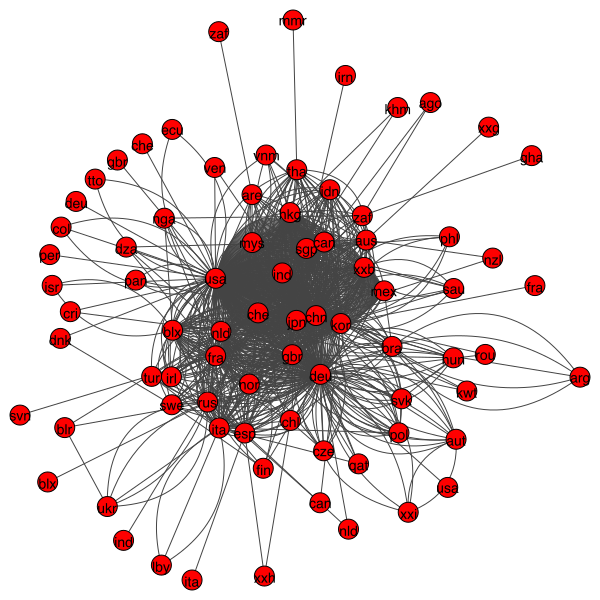

In [12]:
ig.plot(giantMajorWTN2010Graph, vertex_label = MajorWTN2010Graph.vs['name'], directed = True)

In [13]:
giantMajorWTN2010Graph.summary()

'IGRAPH UN-- 79 1242 -- \n+ attr: name (v)'

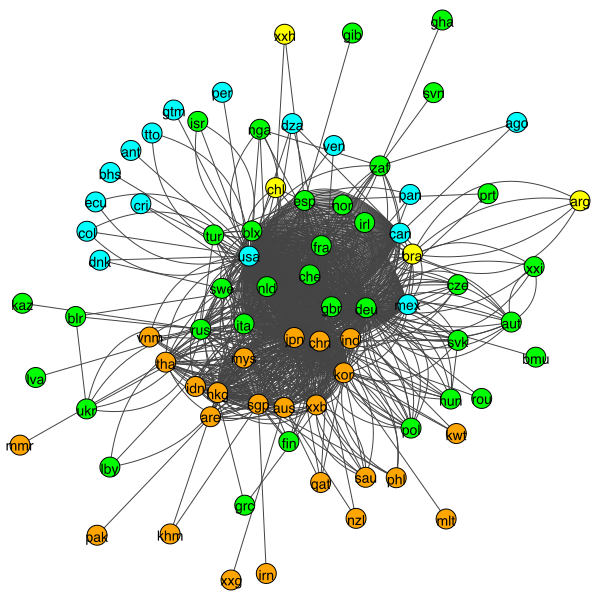

In [14]:
community_levels = giantMajorWTN2010Graph.community_multilevel()
max(community_levels.membership)
commColors = ['orange', 'green', 'cyan', 'yellow','pink']
ig.plot(giantMajorWTN2010Graph, "giantMajor2010communities.png",
     vertex_color=[commColors[x] for x in community_levels.membership], vertex_label = giantMajorWTN2010Graph.vs['name'])

In [15]:
GiantMajor2010_data = pd.DataFrame({'name': [],
                        'betweenness': [],
                        'closeness': [],
                        'pagerank': [],
                        'degree': []
                       })

In [22]:
GiantMajor2010_data['betweenness'] = giantMajorWTN2010Graph.betweenness()
GiantMajor2010_data['closeness'] = giantMajorWTN2010Graph.closeness()
GiantMajor2010_data['pagerank'] = giantMajorWTN2010Graph.pagerank()
GiantMajor2010_data['degree'] = giantMajorWTN2010Graph.degree()
GiantMajor2010_data['name'] = giantMajorWTN2010Graph.vs['name']


In [17]:
GiantMajor2010_data.sort_values(['degree'],ascending=False).head()

,betweenness,closeness,degree,name,pagerank
55,1116.911255,0.702703,374,usa,0.071551
7,564.551757,0.650000,358,chn,0.033933
32,500.310630,0.629032,193,deu,0.035100
13,123.126726,0.604651,177,jpn,0.021049
15,202.349493,0.582090,110,kor,0.032205
